## Converting distance from pixels to meters and back

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

Read one frame from videos

In [25]:
plan = cv2.imread('..\data\jg.jpg')

In [26]:
X = np.linspace(0, plan.shape[1])
right_border = lambda x: - 110 + .68 * x

axes = np.array([151, 163, 175, 188, 202, 218, 235, 260, 285, 318, 358, 405, 470, 555])

Annotate frame with horizontal lines. In reality, distance between two horizontal lines is equal to around 2.5 meters.

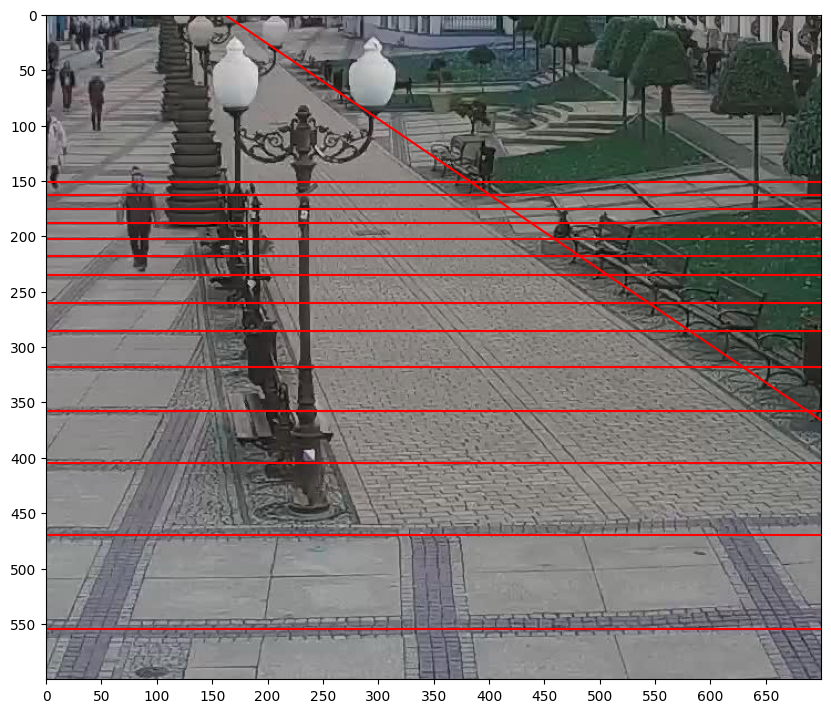

In [27]:
plt.figure(figsize=(10, 10))
plt.imshow(plan)
plt.plot(X, right_border(X), 'r-') 
for y in axes:
    plt.axhline(y=y, color='r', linestyle='-')
plt.ylim(plan.shape[0], 0)
plt.xlim(0, plan.shape[1])
plt.xticks(np.arange(0, plan.shape[1], 50))
plt.yticks(np.arange(0, plan.shape[0], 50))
plt.show()

Having annotated the frame and bearing the real distances in mind, we can calculate the approximate function for conversion pixels to meters and back.

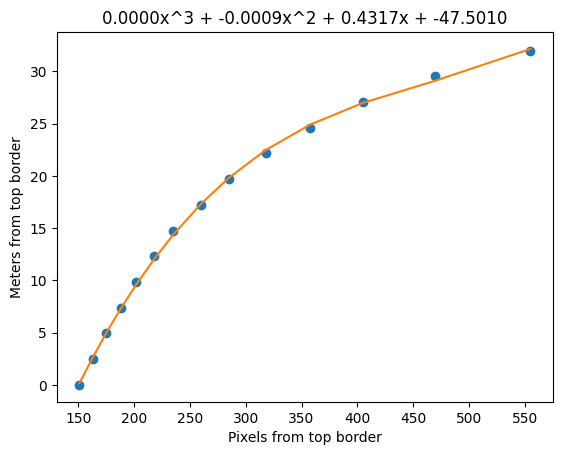

In [28]:
steps = np.linspace(0, 32, 14)

p = np.polyfit(axes, steps, 3)

plt.plot(axes, steps, "o")
plt.plot(axes, np.polyval(p, axes), "-")
plt.title(f"{p[0]:.4f}x^3 + {p[1]:.4f}x^2 + {p[2]:.4f}x + {p[3]:.4f}")
plt.xlabel("Pixels from top border")
plt.ylabel("Meters from top border")
plt.show()

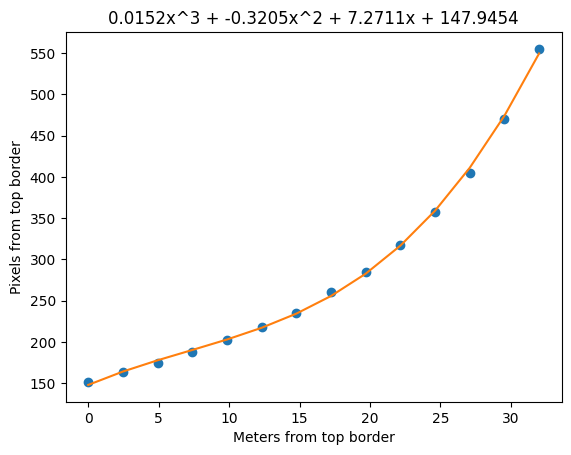

In [29]:
p = np.polyfit(steps, axes, 3)

plt.plot(steps, axes, "o")
plt.plot(steps, np.polyval(p, steps), "-")
plt.title(f"{p[0]:.4f}x^3 + {p[1]:.4f}x^2 + {p[2]:.4f}x + {p[3]:.4f}")
plt.xlabel("Meters from top border")
plt.ylabel("Pixels from top border")
plt.show()

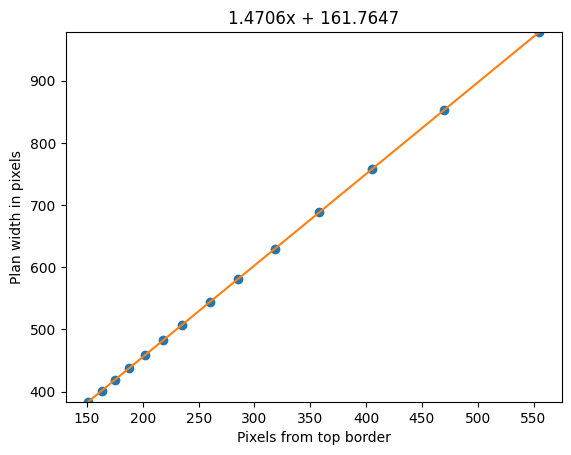

In [30]:
right_border_x = (axes + 110) / 0.68

p = np.polyfit(axes, right_border_x, 1)

plt.plot(axes, right_border_x, "o")
plt.plot(axes, np.polyval(p, axes), "-")
plt.title(f"{p[0]:.4f}x + {p[1]:.4f}")
plt.xlabel("Pixels from top border")
plt.ylabel("Plan width in pixels")
plt.ylim(right_border_x[0], right_border_x[-1])
plt.show()

Result of this calculations is converter with average error rate under 5% in the area of interest.

In [31]:
class DistanceConverter:
    @staticmethod
    def pixels2meters(x, y):
        X_px2meters = (
            lambda x, y: (1 - ((1.47 * y + 161.76 - x) / (1.47 * y + 161.76))) * 8
        )
        Y_px2meters = (
            lambda y: 6.16793058e-07 * y**3
            - 8.61522438e-04 * y**2
            + 4.31688489e-01 * y
            - 4.75010213e01
        )
        return X_px2meters(x, y), Y_px2meters(y)

    @staticmethod
    def meters2pixels(x, y):
        X_meters2px = lambda x, y: (1.47 * y + 161.76) * x / 8
        Y_meters2px = (
            lambda y: 1.51690315e-02 * y**3
            - 3.20503299e-01 * y**2
            + 7.27107405e00 * y
            + 1.47945378e02
        )
        y_px = Y_meters2px(y)
        return X_meters2px(x, y_px), y_px